<a href="https://colab.research.google.com/github/SPlearning27/DDDS-My-Projects/blob/main/Project-1/%20SP_Project1_Transaction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Customer Transaction





# Problem Definition

In this project, the primary purpose is to predict whether or not a future customer will make a transaction based on their previous transaction data.
- This is a supervised binary classification problem.
- The model will predict whether the customers will make successful transactions represented as "1" or will not make transactions represented as "0".



# Data Collection

- The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv
- The input variables are anonymized, so all variables were considered equally.

## Classification method: Gaussian Naive Bayes classification technique

# Data information
- Data overview: 1050000 rows (entries), 104 columns

In [ ]:
#Load Pandas, Numpy, and Matplotlib

from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
#read csv file
transaction = pd.read_csv("https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv")

In [ ]:
# view the column names
transaction.head(10)

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,train_5,0.0,14.6962,18.3383,17.4788,NaN,-9.1355,NaN,NaN,...,NaN,-2.0111,NaN,-3.6166,NaN,NaN,NaN,NaN,NaN,14.4520
6,6,train_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,train_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,train_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,train_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
transaction.shape

(1050000, 104)

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Columns: 104 entries, Unnamed: 0 to var_100
dtypes: float64(102), int64(1), object(1)
memory usage: 833.1+ MB


In [ ]:
transaction.columns

Index(['Unnamed: 0', 'ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3',
       'var_4', 'var_5', 'var_6',
       ...
       'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97',
       'var_98', 'var_99', 'var_100'],
      dtype='object', length=104)

# Data Cleaning

## Finding NaN values

In [ ]:
transaction.isna()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,True,False,True,True,...,True,False,True,False,True,True,True,True,True,False
4,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049995,False,False,False,False,False,False,True,False,True,True,...,True,False,True,False,True,True,True,True,True,False
1049996,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1049997,False,False,False,False,False,False,True,False,True,True,...,True,False,True,False,True,True,True,True,True,False
1049998,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
# Check how many NaN there are in this data.
transaction.isna().sum().sum()

np.int64(97920000)

## Identifying the number of NaNs in the all columns

- There are 97920000 NaNs. Let's think how we can deal with this data if there are too many NaNs.



In [ ]:
transaction_nasum = transaction.isna().sum()
transaction_nasum

,0
Unnamed: 0,0
ID_code,0
target,870000
var_0,870000
var_1,870000
...,...
var_96,1050000
var_97,1050000
var_98,1050000
var_99,1050000


## Drop the unnecessary columns (identifier columns)
Since this dataset is anonymized, first let's drop these two unnecessary columns that will not be used for this analysis.
- "Unnamed: 0" and
- "ID_code"

In [ ]:
#Drop the 'Unnamed: 0' column, as it's likely an index column from the CSV
transaction.drop("Unnamed: 0", axis=1, inplace=True)

# Drop the 'ID_code' column as specified in the project description
transaction.drop('ID_code', axis=1, inplace=True)

# view the column names to verify the changes
transaction.head(10)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,-1.9254,6.4760,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,14.6962,18.3383,17.4788,NaN,-9.1355,NaN,NaN,-6.4882,6.0821,...,NaN,-2.0111,NaN,-3.6166,NaN,NaN,NaN,NaN,NaN,14.4520
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drop the columns that contain only NaN values

- Since there are 1,050,000 entries, the columns filled with all 1,050,000 nulls will be discarded.




In [ ]:
# Drop the columns that only contains NaNs by checking which columns have a sum of NaNs equal to the number of rows (entries of 1,050,000).
cols_to_drop = transaction.columns[transaction.isna().sum() == len(transaction)]
transaction.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
transaction.head()

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.476,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- There are 51 columns remaining after removing the columns filled with NaN only.
- These 51 columns include the first column, the target column and 49 variables contains values and NaNs.

In [ ]:
transaction.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,180000.0,0.100222,0.300297,0.0000,0.000000,0.00000,0.000000,1.0000
var_0,180000.0,7.440715,3.021636,-2.6917,5.160325,7.35095,9.511125,16.7165
var_1,180000.0,15.870166,3.010492,6.2993,13.830400,15.93460,18.061425,26.0791
var_2,180000.0,12.735619,4.185923,-1.0185,9.664675,12.67070,15.837300,26.9976
var_4,180000.0,-0.668334,5.968300,-22.7487,-4.997500,-0.56030,3.632525,18.8554
var_7,180000.0,1.190419,5.169343,-15.1940,-2.571400,1.19460,5.090450,18.4714
var_8,180000.0,6.813431,0.375564,5.3593,6.544100,6.80680,7.070900,8.3091
var_14,180000.0,11.946357,7.364523,-19.5443,6.756875,11.92530,17.039600,39.3968
var_15,180000.0,2.963064,0.369891,1.8512,2.698400,2.95990,3.241425,4.2204
var_17,180000.0,8.528080,4.641700,-6.0111,5.065750,8.59920,12.273300,22.3315


In [ ]:
transaction.isna().sum()

,0
target,870000
var_0,870000
var_1,870000
var_2,870000
var_4,870000
var_7,870000
var_8,870000
var_14,870000
var_15,870000
var_17,870000


- So, there are 51 columns and 870,000 rows remaining.
- And, 180,000 rows with numerical data based on the statistical description shown above.

## Filtering out the NaN from the target column

- Let's investigate if the target column contains all "0" and "1" only. If there are NaNs, NaNs will be dropped from the target column.

In [ ]:
# To check the target  values
transaction['target'].unique()

array([nan,  0.,  1.])

In [ ]:
# Since we need to focus on the indicated transactions with "0" (no-transaction) and "1"(successful transaction), let's check if all of values in the target column are valid.
transaction['target'] .value_counts(dropna=False)

,count
target,
NaN,870000
0.0,161960
1.0,18040


In [ ]:
# Drop NaN in the rows that have any NaNs
# Return the modified dataframe by creating a new one (that's why inplace = True)
transaction.dropna(subset=['target'], axis=0, how='any', inplace= True)
transaction # to print the transaction datafram

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,0.0,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,0.0,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,1.0,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,0.0,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689


In [ ]:
# Recheck the values in the target column
transaction['target'].unique()

array([0., 1.])

## Data summary after cleaning: 180000 rows and 51 columns



In [ ]:
# Make a copy of cleaned data after the data cleaning step
transaction_cleaned = transaction.copy()
transaction_cleaned

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,0.0,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,0.0,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,1.0,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,0.0,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689


In [ ]:
# Check the demention of this dataframe after dropping NaN in the target column
transaction_cleaned.shape

(180000, 51)

In [ ]:
# To check back if this dataframe still contains "NaN", see the codes below
transaction_cleaned.isna().sum()

,0
target,0
var_0,0
var_1,0
var_2,0
var_4,0
var_7,0
var_8,0
var_14,0
var_15,0
var_17,0


In [ ]:
transaction_cleaned.isna() # if no missing values, .isna() returns boolean as False

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1049993,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1049995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1049997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
transaction_cleaned.info() #to check the information of the new tracsaction dataframe.

<class 'pandas.core.frame.DataFrame'>
Index: 180000 entries, 3 to 1049999
Data columns (total 51 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   target   180000 non-null  float64
 1   var_0    180000 non-null  float64
 2   var_1    180000 non-null  float64
 3   var_2    180000 non-null  float64
 4   var_4    180000 non-null  float64
 5   var_7    180000 non-null  float64
 6   var_8    180000 non-null  float64
 7   var_14   180000 non-null  float64
 8   var_15   180000 non-null  float64
 9   var_17   180000 non-null  float64
 10  var_20   180000 non-null  float64
 11  var_21   180000 non-null  float64
 12  var_22   180000 non-null  float64
 13  var_24   180000 non-null  float64
 14  var_26   180000 non-null  float64
 15  var_27   180000 non-null  float64
 16  var_28   180000 non-null  float64
 17  var_29   180000 non-null  float64
 18  var_36   180000 non-null  float64
 19  var_37   180000 non-null  float64
 20  var_38   180000 non-null  floa

# Exploratory Data Analysis




Let's explore if this cleaned dataframe can fit to the Gaussian Naive Bayes classification?
- Assumption 1: Each variable is normally distributed.
- Assumption 2: Each variable is not correlated with other variables.

## Histogram plots: Normal distribution of all variables

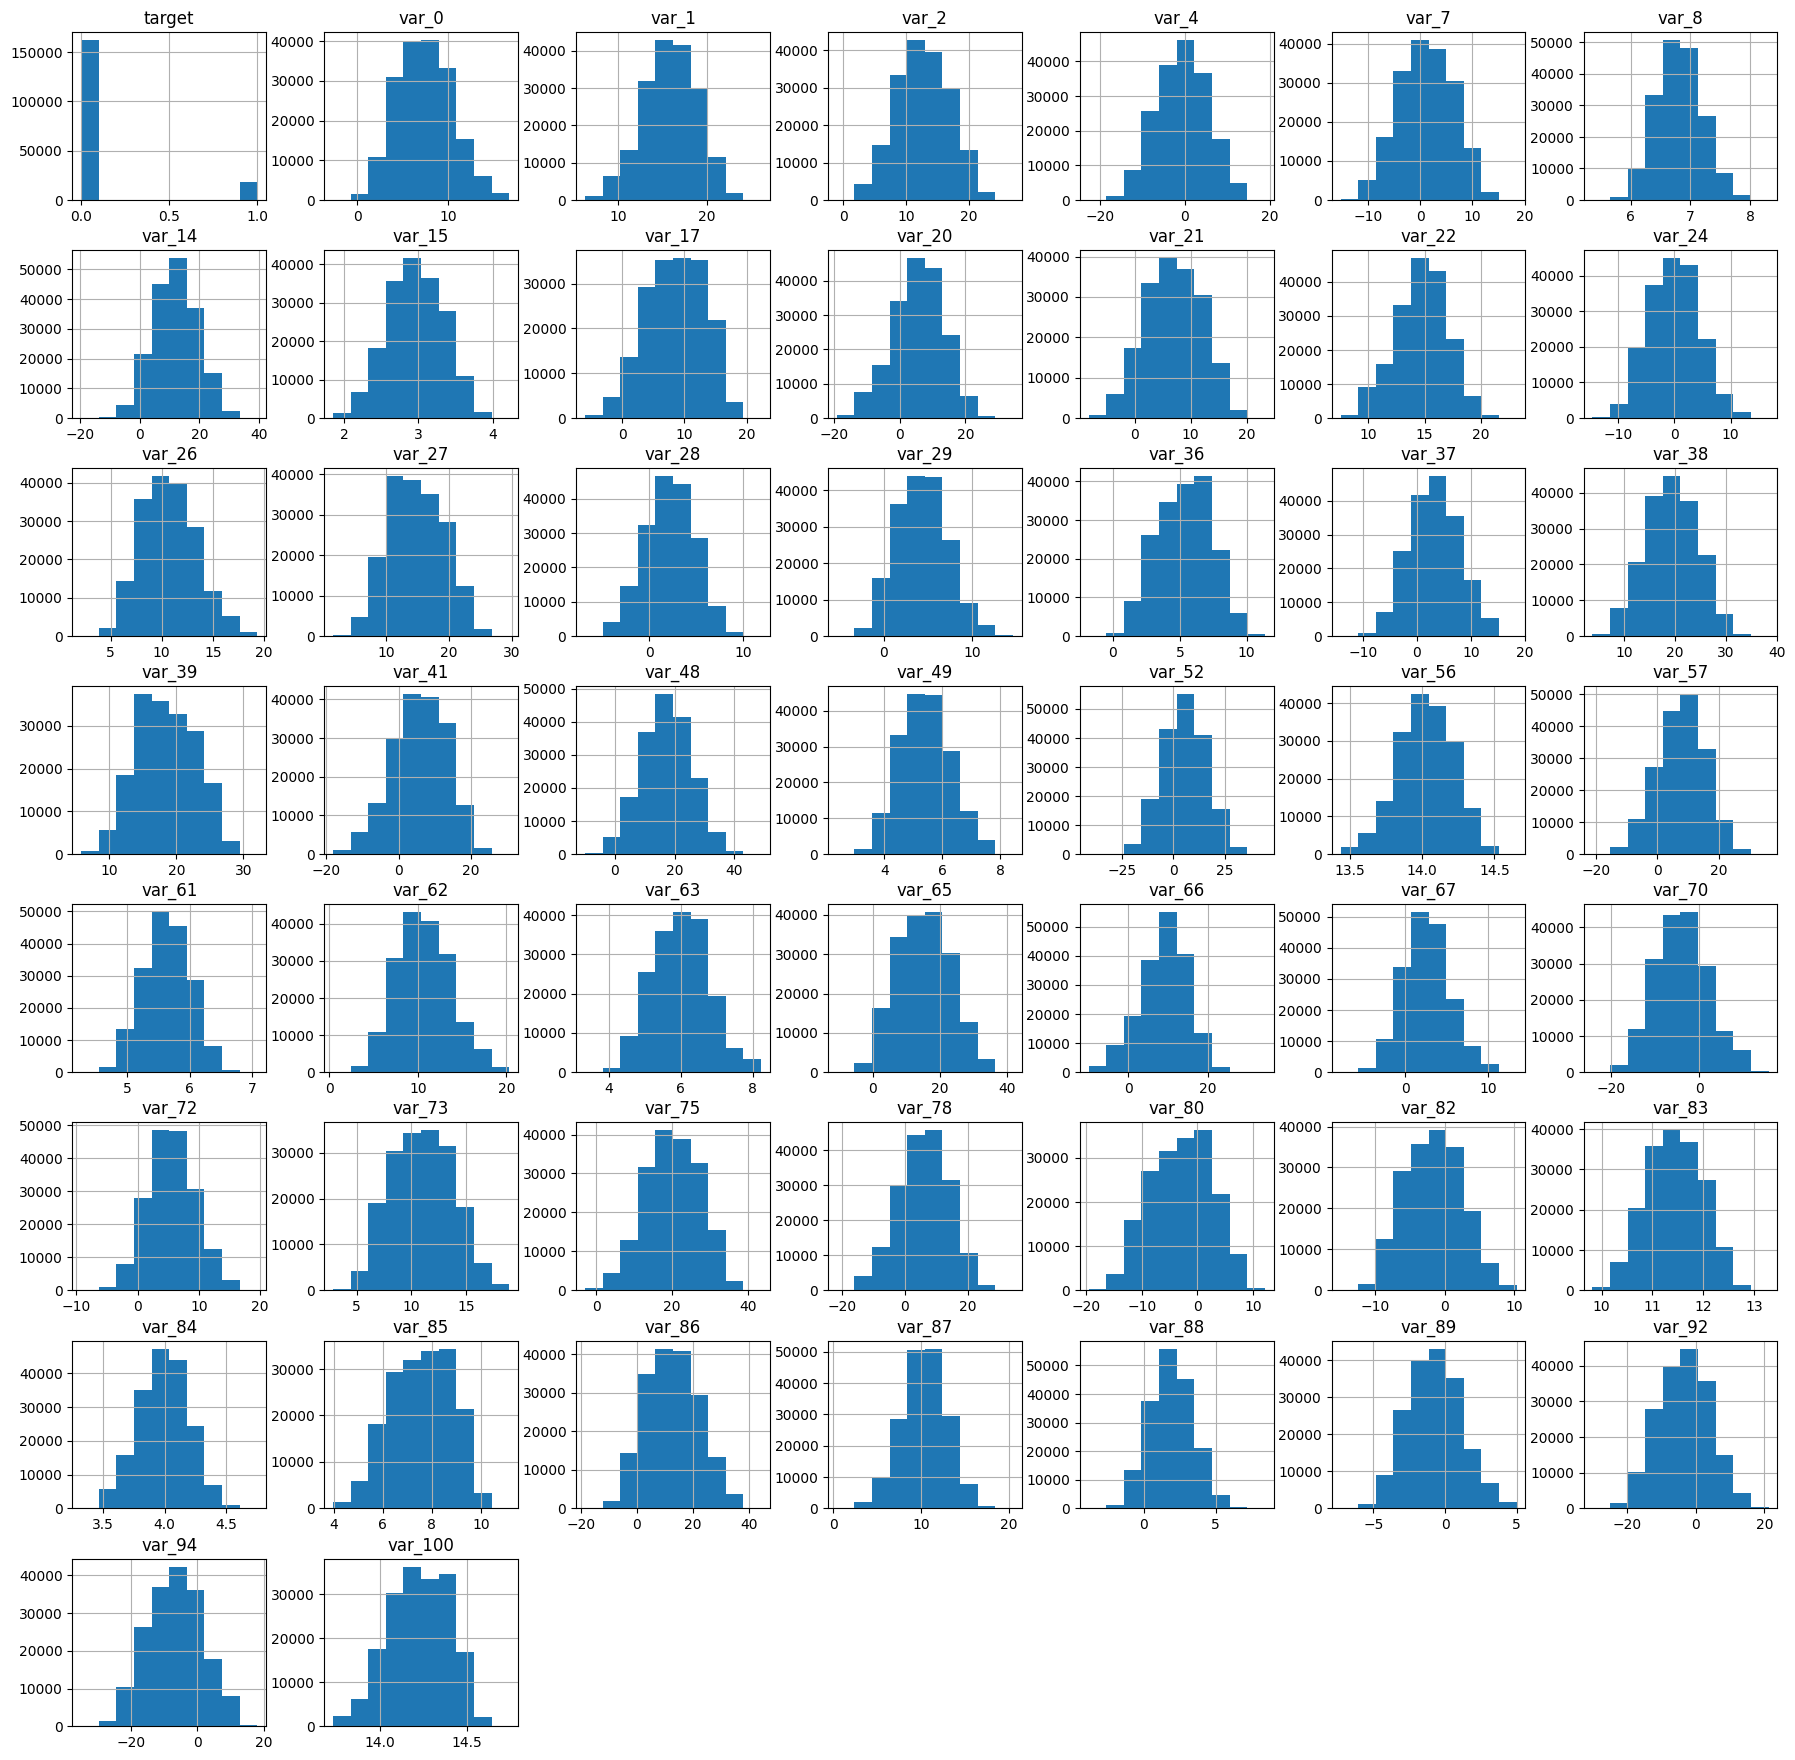

In [ ]:
transaction_cleaned.hist(figsize=(22,22));

- Each variable is categorized into two groups of '0' for no transaction and '1' for successful transaction based on its value in the target column.  

## Target categories based on its value in the target column

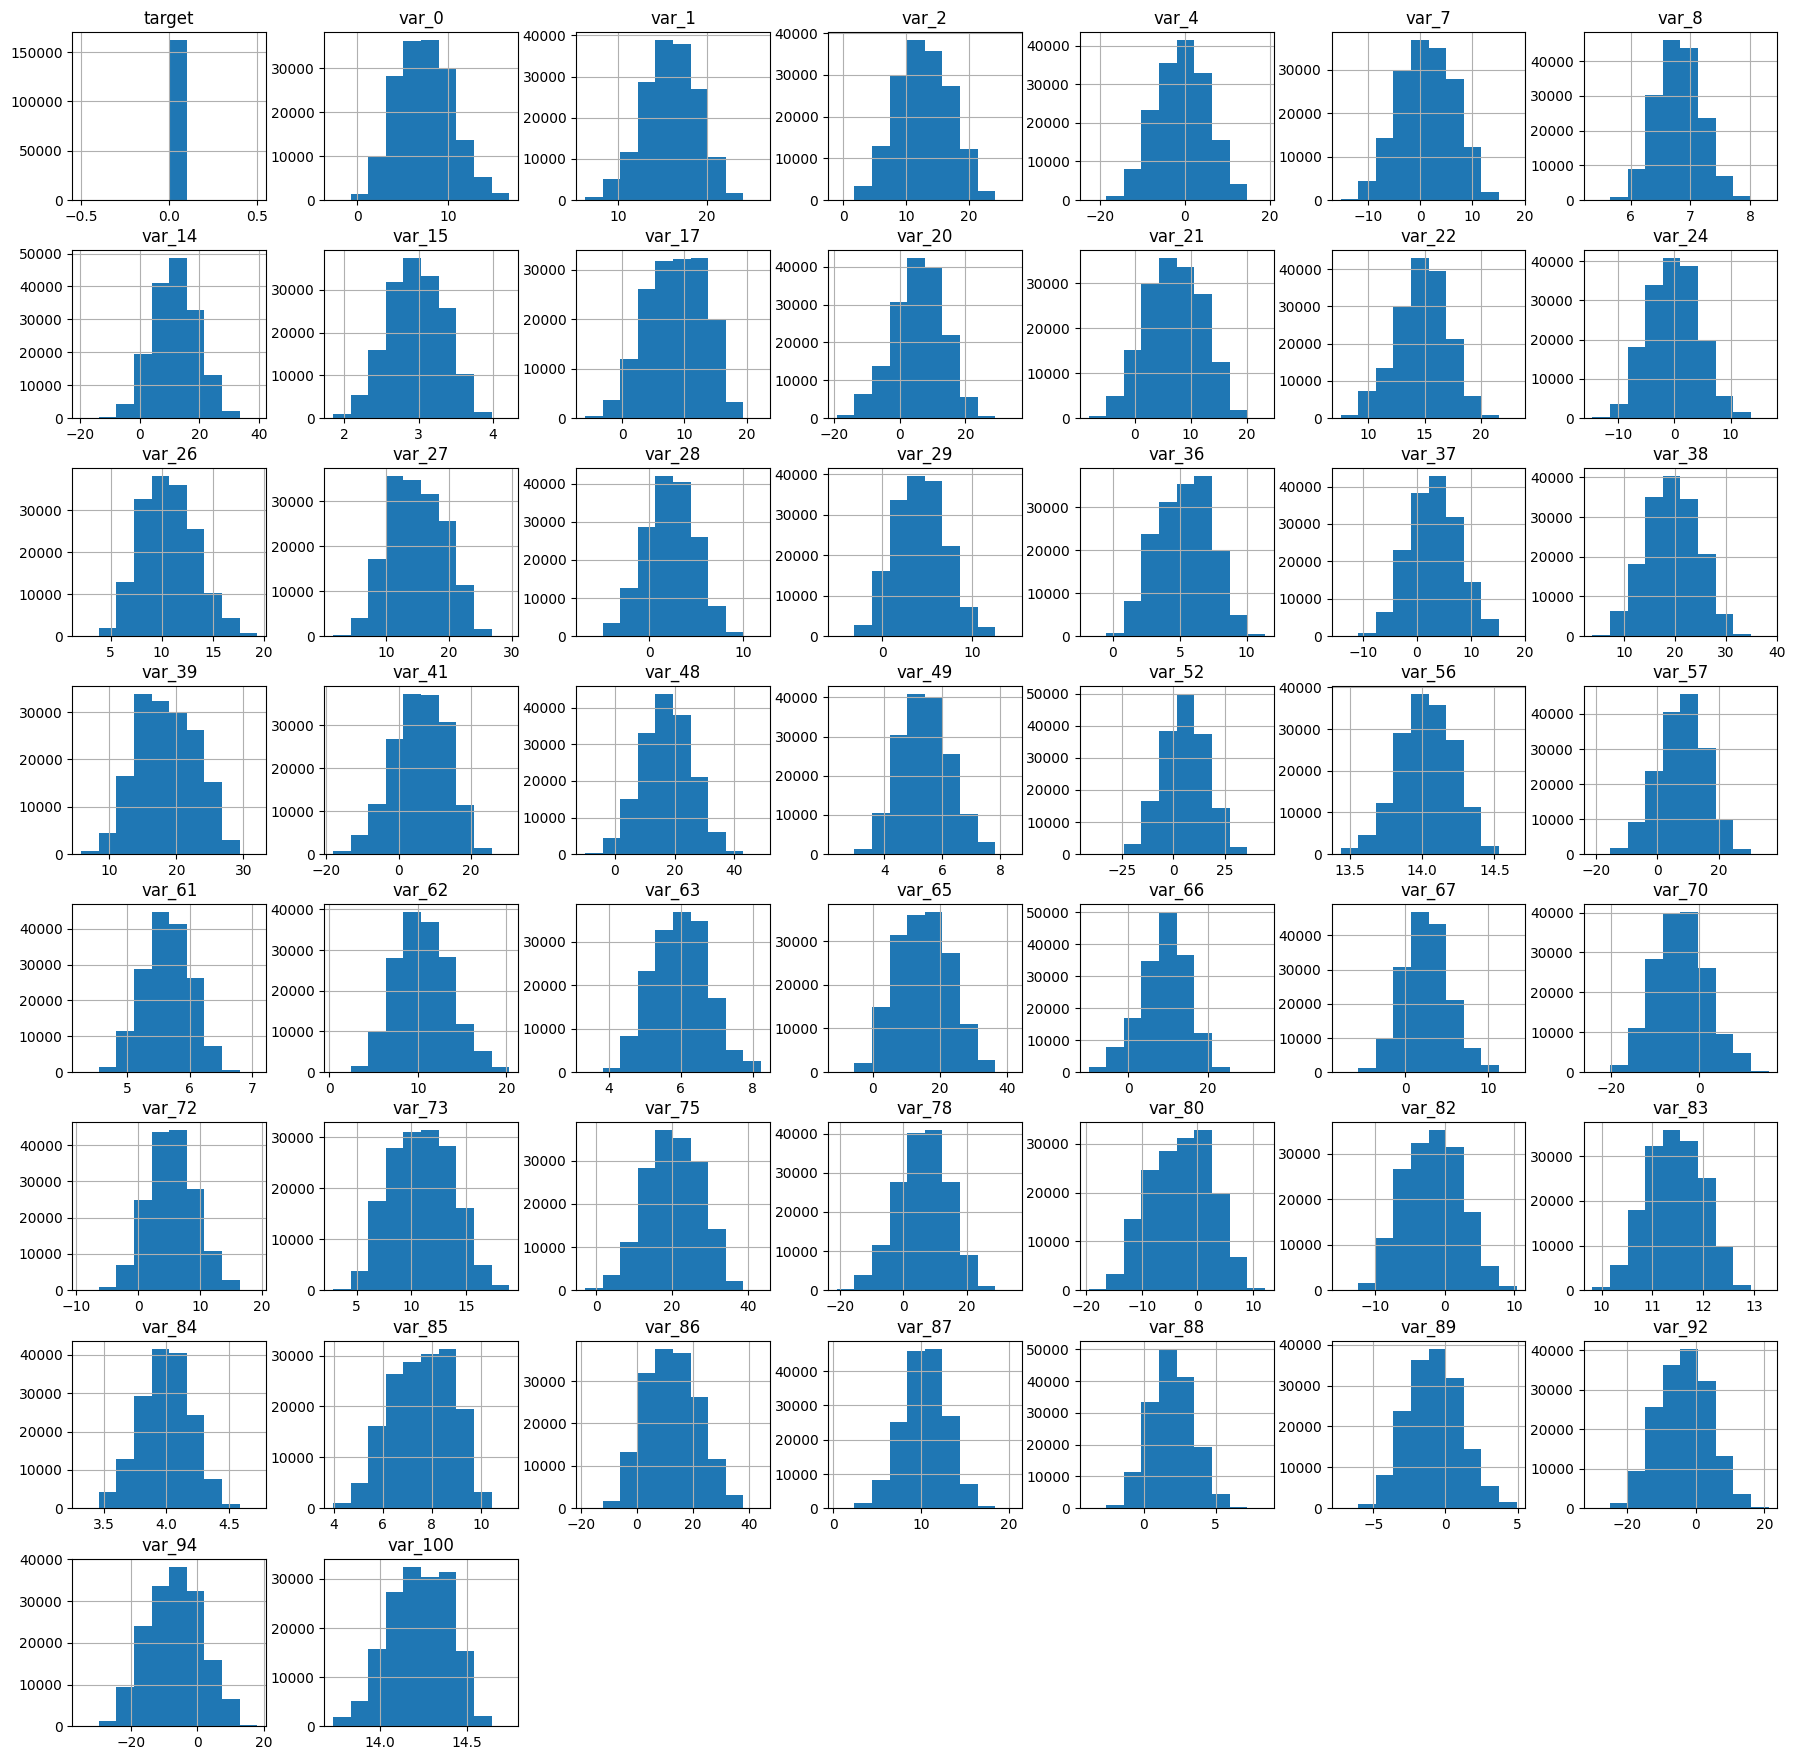

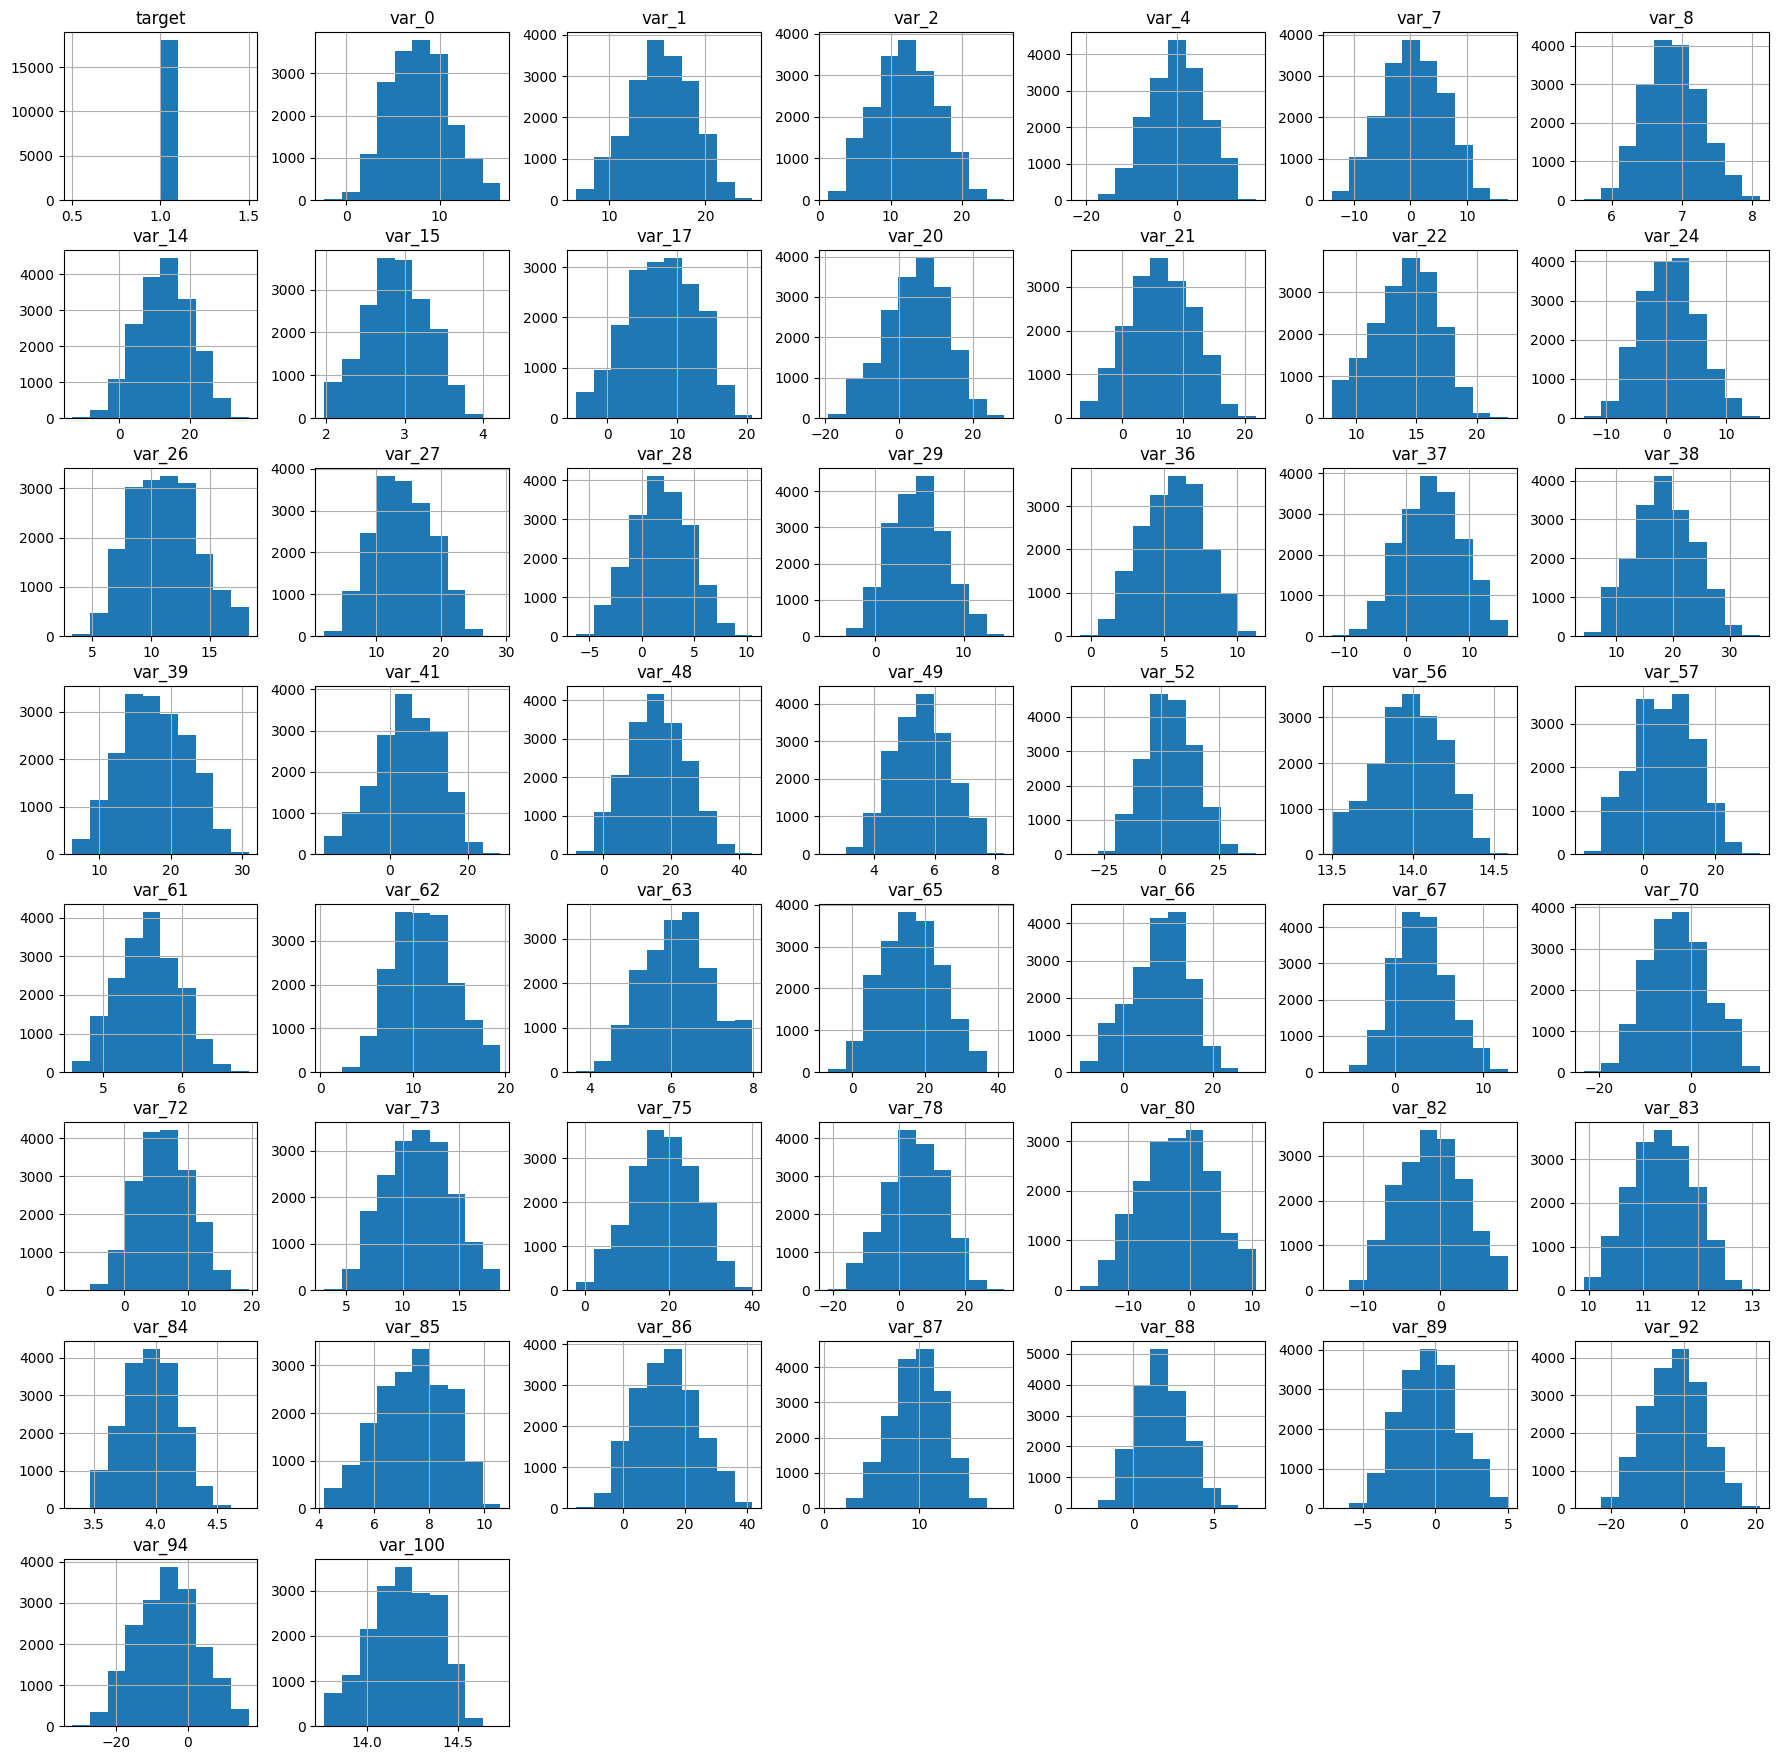

In [ ]:
# using .groupby() to split variables into each group based on its value in the 'target' column,
# then, apply a function to combine the divided group into the histogram plots.
transaction_cleaned.groupby(['target']).hist(figsize=(22,22));

- Then, let's check the correlation values between all predictor columns to ensure there are no substantial correlations between predictors.
- This is important to support the decision to classify the ‘target’ using Guassian Naïve Bayes classification, which can be used if each variable is not correlated with each other, but only correlated with itself.

## Cross-check the correlation values between all variables (predictor columns)

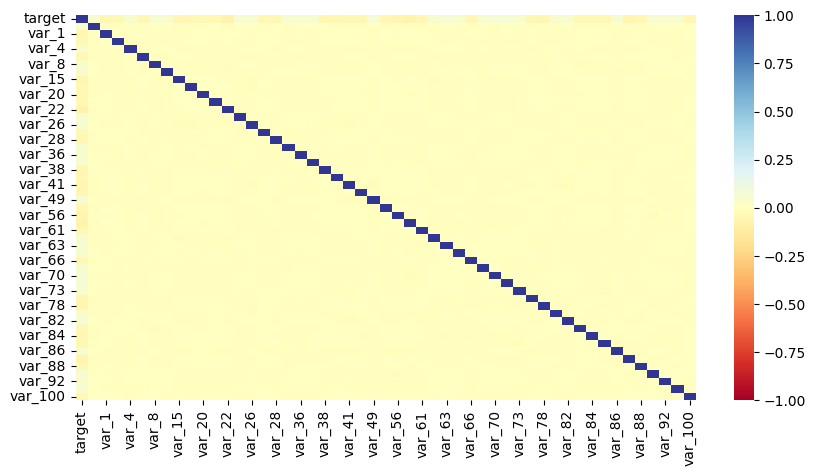

In [ ]:
# correlation plot
corr = transaction_cleaned.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, cmap='RdYlBu',annot = False, vmin=-1, vmax=1);

## Create TWO data frames: Successful transaction "1" | No transaction "0"

In [ ]:
# Data frame with only successful transactions "1"
success_transaction = transaction_cleaned[transaction_cleaned['target']== 1].copy()
success_transaction.shape

(18040, 51)

In [ ]:
# Data frame with only no transactions "0"
no_transaction = transaction_cleaned[transaction_cleaned['target']== 0].copy()
no_transaction.shape

(161960, 51)

# Data Processing



## Create TWO data frames: target df | all predictors df for testing the model

In [ ]:
# We'll separate our predictors (columns) and target column
# Create a copy of the dataframe excluding the target column
df_predictors = transaction_cleaned.drop('target', axis=1).copy()

# Create a copy of the data frame only containing the target column
df_target = transaction_cleaned['target'].copy() # this line is for creating a new data pandas Series containing only 'target' column

###1. Bar plot showing the number of counts of each variable in the target column

In [ ]:
# Calculate the value counts of the target column and store it in a new variable called transaction_target_counts
transaction_target_counts = df_target.value_counts() # Create a new Series of the value counts in the target column
print(transaction_target_counts)

target
0.0    161960
1.0     18040
Name: count, dtype: int64


In [ ]:
# Convert the Series to a DataFrame for plotting with seaborn
# The index of the Series becomes the 'Target' column and the values become the 'Count' column
transaction_target_counts_df = transaction_target_counts.reset_index()
transaction_target_counts_df.columns = ['Target', 'Count']

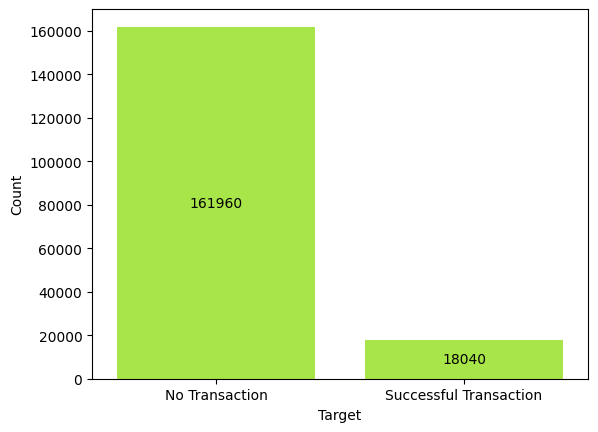

In [ ]:
# Use a barplot to display categorical data where the length of each bar represents the value of the corresponding category
bp = sns.barplot(data= transaction_target_counts_df, x="Target", y="Count", color = 'greenyellow');
plt.bar_label(bp.containers[0], label_type='center')
plt.xticks(['0.0', '1.0'], ['No Transaction', 'Successful Transaction'])
plt.show();


###2. Count plot showing the quantity of each variable in the target column

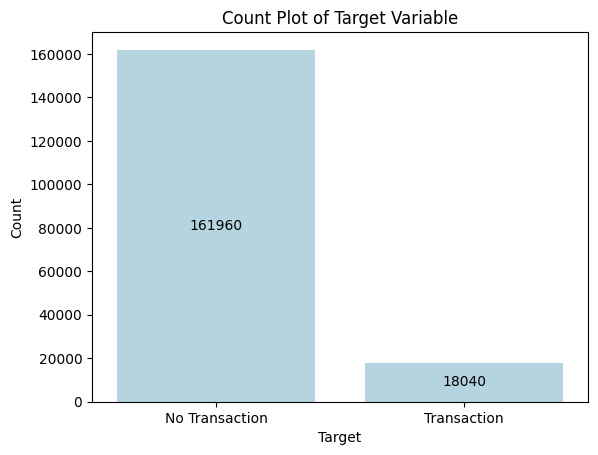

In [ ]:
# Count plot to show the distribution of Target variables in the cleaned data frame
ax = sns.countplot(data= transaction_cleaned,x = 'target', color = 'lightblue');
ax.bar_label(ax.containers[0], label_type='center')
plt.title('Count Plot of Target Variable');
plt.xticks([0, 1], ['No Transaction', 'Transaction'])
plt.xlabel('Target')
plt.ylabel('Count');
plt.show();

####Note: these two plots display same output by using diffent ways to specify the dataframe

## **Gaussian Naive Bayes Model**
- Again, GNB model can be used only if all predictors are correlated with each other.

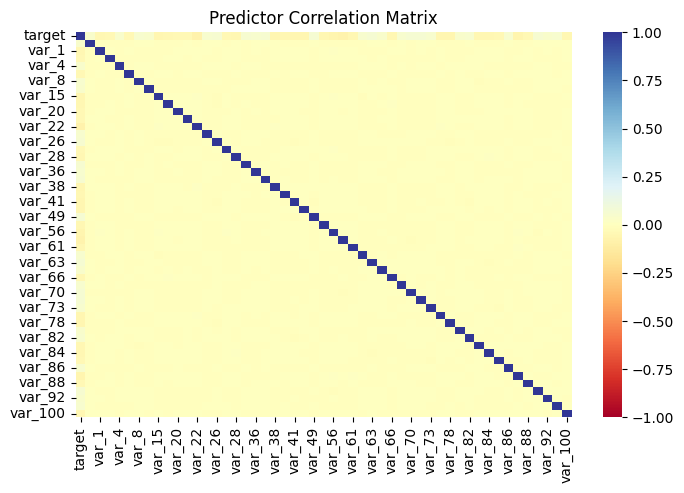

In [ ]:
# correlation plot of the predictors with no transaction
corr_cleaned_transaction = transaction_cleaned.corr()
plt.figure(figsize=(8,5))
plt.title('Predictor Correlation Matrix');
sns.heatmap(corr, cmap='RdYlBu',annot = False, vmin=-1, vmax=1);

##Results of testing the distribution and correlation of variables
1. Each variable of this dataset is normally distributed.
2. Each variable is not highly correlated with each other; instead, it is correlated with itself.

Hence, the Gaussian Naive Bayes model can be used to create this binary classification model.

## Create the GNB model

In [ ]:
# Create a Naive Bayes Classifier (This is an emtpy model)
modelGNB = GaussianNB()

In [ ]:
# We'll separate our features (columns) and target column
# Create a copy of the dataframe excluding the target column

# x represents features of the dataframe referring to the columns of var_0 to var_100
X = transaction_cleaned.drop('target', axis=1, inplace=False)

# y represents target
y = transaction_cleaned['target'].copy() # y represents target

1. Initial Split and Prediction (for a single evaluation)

In [ ]:
# To train the model and use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# See if the GNB model fits this dataset (transaction.cleaned)
modelGNB.fit(X_train, y_train)

# Then, compare the prediction of the data called y_pred vs. the test set named x_test, and tells how accuracy it is.
y_pred = modelGNB.predict(X_test)

In [ ]:
# Compare the y_test (20% that was hidden from the model) with the y_pred
print("--- Single Train/Test Split Results ---")
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], # give the total number of samples in the test set
       (y_test != y_pred).sum())) # this line counts how many times the model's prediction (y_pred) did not match the actual target value (y_test) in the test set.

# print(f"Number of mislabeled points out of a total {x_test.shape[0]} points : {(y_test != y_pred).sum()}"
# Also, print the accuracy score of a single split
print("Accuracy score for single split:", metrics.accuracy_score(y_test, y_pred))


--- Single Train/Test Split Results ---
Number of mislabeled points out of a total 36000 points : 3144
Accuracy score for single split: 0.9126666666666666


In [ ]:
for i in [X_train, X_test, y_train, y_test]:
  print(type(i))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
for i in [X_train, X_test, y_train, y_test]:
  print(i.shape)

(144000, 50)
(36000, 50)
(144000,)
(36000,)


In [ ]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
(y_test.to_numpy() - y_pred)*1000

array([0., 0., 0., ..., 0., 0., 0.])

## Cross-Validation

- Now, let's perform a cross-validation loop to calculate the accuracy score of this Gaussian Naive Bayes model.
- The function below performs multiple train-test splits within a loop and collects multiple accuracy scores

In [ ]:
# To perform cross validation to see what our average accuracy is,
# First, we'll create a function for cross-validation.

def cross_validate(X, y, num_loops):
  '''
  Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.

  '''

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB() # inside each loop, a brand new instance of GaussianNB is created to ensure that each iteration starts with a clean, untrained model
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

2. Call the cross_validate function and store the results

### Report: CV accuracy scores

In [ ]:
# Re-test the cross validation for 100 times and store in the variable named cv_accuracy_scores
num_cross_validation_loops = 100
cv_accuracy_scores = cross_validate(X, y, num_cross_validation_loops)
cv_accuracy_mean = cv_accuracy_scores.mean()

# Calculate the mean and standard deviation of these accuracy scores(100 scores)
mean_cv_accuracy = np.mean(cv_accuracy_scores)
std_cv_accuracy = np.std(cv_accuracy_scores)
print(f"\nMean Accuracy from Cross-Validation: {mean_cv_accuracy:.4f}")
print(f"Standard Deviation of Accuracy from Cross-Validation: ±{std_cv_accuracy:.4f}")

# Print individual scores
print("\n--- Detailed Cross-Validation Scores (%d Loops) ---" % num_cross_validation_loops)
print(cv_accuracy_scores)





Mean Accuracy from Cross-Validation: 0.9113
Standard Deviation of Accuracy from Cross-Validation: ±0.0013

--- Detailed Cross-Validation Scores (100 Loops) ---
[0.91416667 0.90936111 0.91227778 0.91136111 0.91036111 0.91038889
 0.90977778 0.91175    0.91344444 0.91116667 0.91083333 0.91030556
 0.913      0.91066667 0.91344444 0.91097222 0.911      0.90991667
 0.90897222 0.90980556 0.91102778 0.91130556 0.91127778 0.91066667
 0.91219444 0.91       0.913      0.91080556 0.91105556 0.91066667
 0.91144444 0.91155556 0.91197222 0.91038889 0.90925    0.91291667
 0.91163889 0.91122222 0.90983333 0.91263889 0.90922222 0.91363889
 0.91055556 0.91213889 0.91238889 0.91013889 0.91122222 0.91161111
 0.91222222 0.91288889 0.91333333 0.91055556 0.91380556 0.91161111
 0.91191667 0.91558333 0.91347222 0.91225    0.91230556 0.91163889
 0.91177778 0.91169444 0.91172222 0.91163889 0.91205556 0.91088889
 0.91136111 0.90975    0.90894444 0.91097222 0.91147222 0.91219444
 0.91247222 0.91202778 0.91213889 0


> The accuracy of this model is 91%.



# Data Visualization

Let's observe how the distribution of accuracy scores looks like?

## Cross-validation at 80/20 training/testing model

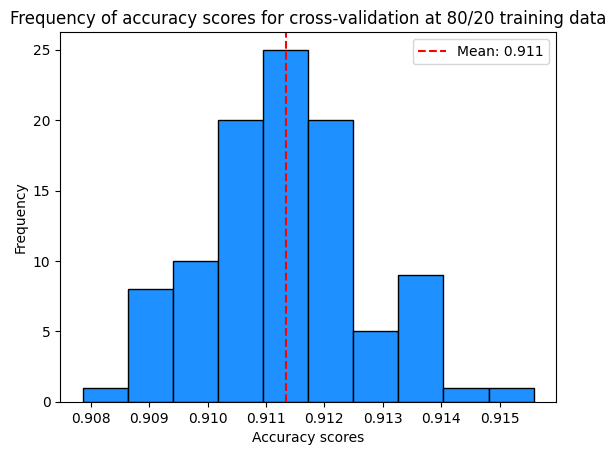

In [ ]:
plt.hist(cv_accuracy_scores, color='dodgerblue', edgecolor='black')
plt.title('Frequency of accuracy scores for cross-validation at 80/20 training data')
plt.xlabel('Accuracy scores')
plt.ylabel('Frequency');
plt.axvline(cv_accuracy_mean, color='red', linestyle='--', label=f'Mean: {cv_accuracy_mean:.3f}')
plt.legend();
plt.show()

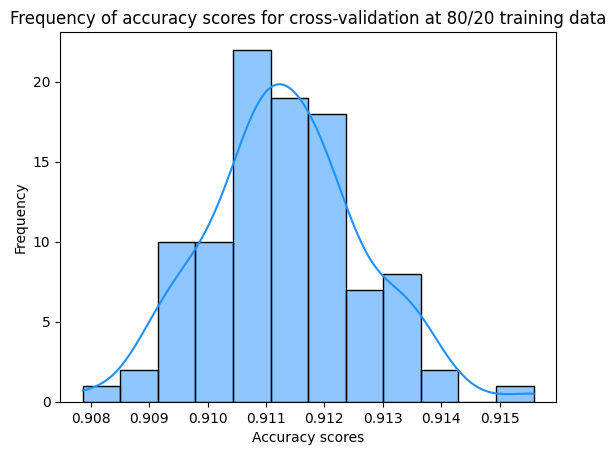

In [ ]:
sns.histplot(x = cv_accuracy_scores, kde = True, color='dodgerblue')
plt.title('Frequency of accuracy scores for cross-validation at 80/20 training data')
plt.xlabel('Accuracy scores')
plt.ylabel('Frequency');
plt.show()

## Confusion Matrix at 80/20 training/testing model
- Confusion matrix is plotted to visualizes and summarizes the performance of this Gaussian Naive Bayes classification model.

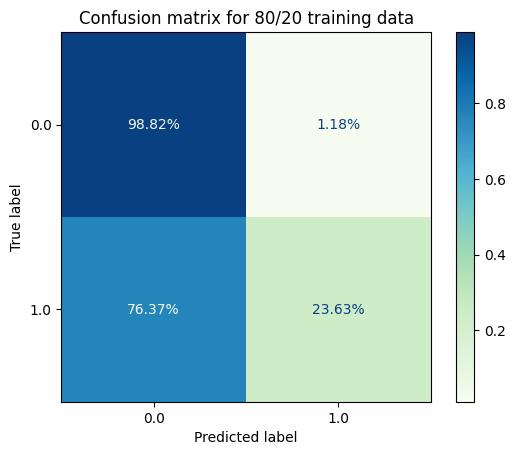

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    modelGNB,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix for 80/20 training data') ;
plt.savefig('confusion_matrix.png')

> We can see that our model performs better if it is used to predict that the customers do not transaction rather than if the customers will make the transactions.

> But, hold on a sec!
If we look at the frequency of the no transactions versus the successful transactions, we can see that our input data was imbalanced by skewing towards the no transactions instead of the successful transactions.

> ***Meaning that we might not be able to use this model to predict whether the customers will make transactions with this dataset.



## Cross-validation at 50/50 training/testing model
- generate a balanced dataset of successful transaction and no transaction

In [ ]:
# Reform the number of counted values with no transaction only
no_transaction_50 = no_transaction.sample(n=18040)
transaction_balanced = pd.concat([no_transaction_50,success_transaction], ignore_index=True)

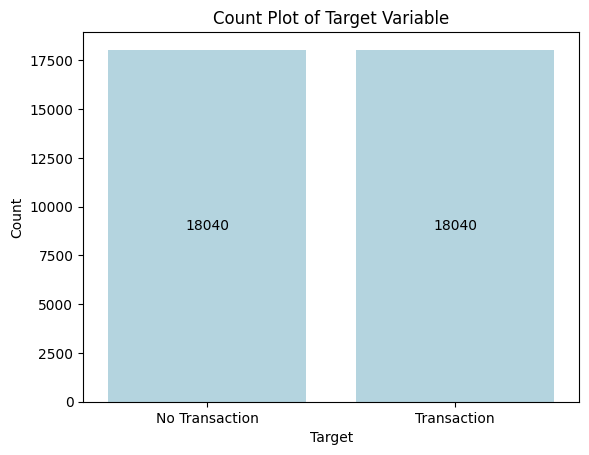

In [ ]:
# Count plot to show the distribution of Target variables in the cleaned data frame
ax = sns.countplot(data= transaction_balanced,x = 'target', color = 'lightblue');
ax.bar_label(ax.containers[0], label_type='center')
plt.title('Count Plot of Target Variable');
plt.xticks([0, 1], ['No Transaction', 'Transaction'])
plt.xlabel('Target')
plt.ylabel('Count');
plt.show();

In [ ]:
# X_2 represents features of the balanced dataframe referring to the columns of var_0 to var_100
X_2 = transaction_balanced.drop('target', axis=1, inplace=False)

# y represents target in the balanced dataframe
y_2 = transaction_balanced['target'].copy() # y represents target

In [ ]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.20);
modelGNB.fit(X_2_train, y_2_train);
y_pred = modelGNB.predict(X_2_test);

In [ ]:
# Corss-validation for 100 times with the balanced dataset
accuracy_scores_balanced = cross_validate(X_2, y_2, 100)
cv_accuracy_balanced = accuracy_scores_balanced.mean()
print(round(accuracy_scores_balanced.mean(), 5))

# .mean is used to extract the average of taccuracy scores of this model testing and 5 means decimal pointshe

0.75405


In [ ]:
# Reporting cv accuracy scores
mean_cv_accuracy_bl = np.mean(accuracy_scores_balanced)
std_cv_accuracy_bl = np.std(accuracy_scores_balanced)

print(f"Cross-Validation Accuracy (Mean): {mean_cv_accuracy_bl:.4f}")
print(f"Cross-Validation Accuracy (Standard Deviation): ±{std_cv_accuracy_bl:.4f}")

print("\nDetailed Cross-Validation Scores of 50/50 training data (100):")
print(accuracy_scores_balanced[:]) # Print all accuracy scores to show individual scores


Cross-Validation Accuracy (Mean): 0.7540
Cross-Validation Accuracy (Standard Deviation): ±0.0047

Detailed Cross-Validation Scores of 50/50 training data (100):
[0.75692905 0.75332594 0.74958426 0.75817627 0.76136364 0.75748337
 0.75110865 0.75443459 0.75124723 0.74792129 0.75623614 0.74875277
 0.75013858 0.75221729 0.75401885 0.75512749 0.75388027 0.75970067
 0.75138581 0.76150222 0.75415743 0.75471175 0.75097007 0.74889135
 0.74445676 0.75277162 0.75554324 0.75665188 0.75720621 0.76482816
 0.76067073 0.7565133  0.75194013 0.76136364 0.75249446 0.75332594
 0.75332594 0.75485033 0.75540466 0.75401885 0.7594235  0.75443459
 0.76011641 0.75692905 0.74986142 0.75138581 0.74916851 0.75249446
 0.75       0.75803769 0.75859202 0.75041574 0.74972284 0.7434867
 0.76385809 0.75789911 0.75665188 0.76025499 0.75928492 0.7536031
 0.74085366 0.74667406 0.75429601 0.76108647 0.74736696 0.74819845
 0.74902993 0.74695122 0.74833703 0.75457317 0.75817627 0.74722838
 0.75706763 0.75637472 0.75263304 0.7

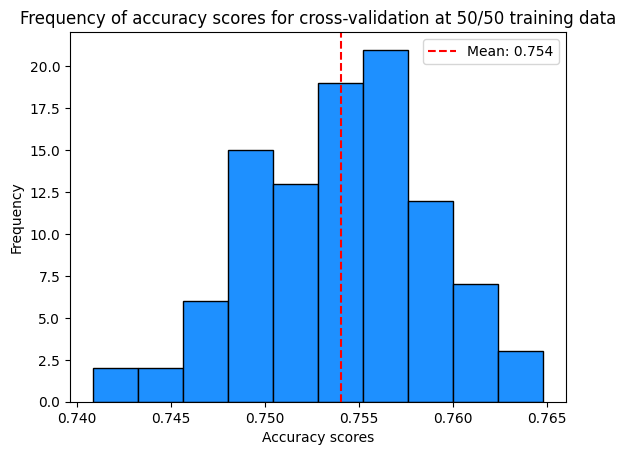

In [ ]:
plt.hist(accuracy_scores_balanced, color='dodgerblue', edgecolor='black')
plt.title('Frequency of accuracy scores for cross-validation at 50/50 training data')
plt.xlabel('Accuracy scores')
plt.ylabel('Frequency');
plt.axvline(cv_accuracy_balanced, color='red', linestyle='--', label=f'Mean: {cv_accuracy_balanced:.3f}')
plt.legend();
plt.show()

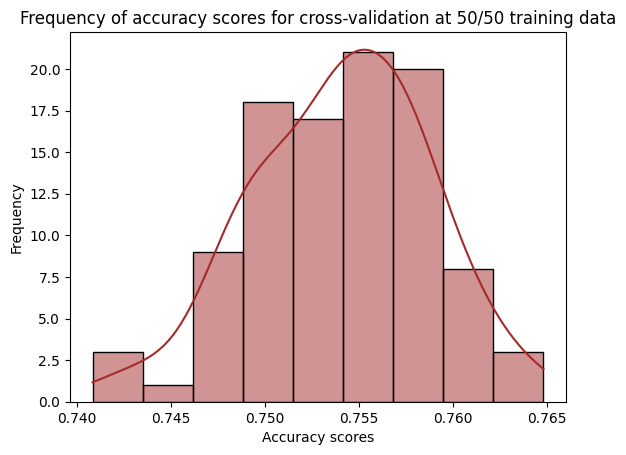

In [ ]:
sns.histplot(x = accuracy_scores_balanced, kde = True, color='brown')
plt.title('Frequency of accuracy scores for cross-validation at 50/50 training data')
plt.xlabel('Accuracy scores')
plt.ylabel('Frequency');
plt.show()

## Confusion Matrix at 50/50 training/testing model

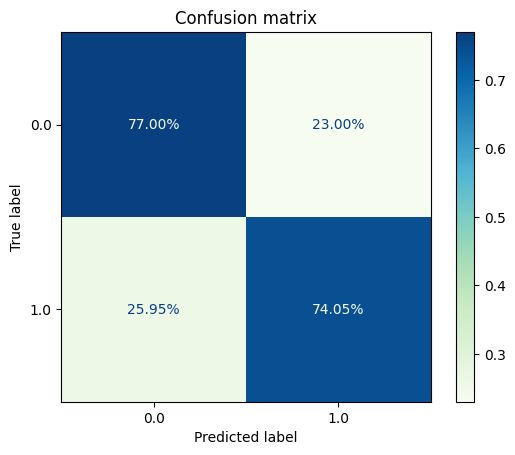

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    modelGNB,
    X_2_test,
    y_2_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

# Conclusion



Important features:

We saw that the binary values in the column named "target" was the most crucial parameter in determining whether the customers would make transactions.

Model performance:
- Using Naive Bayes resulted in an acceptable accuracy of 91% in our cross-validation tests.

- None of the unique variables are correlated with each other meaning that Gaussian Naive Bayes is a suitable model to use with this dataset prediction.
- Our model did better at predicting if the customers did not make transactions than if the customers would make transactions. This is because our input dataset was imbalanced by skewing towards the group of no transaction in the training set.

- For the balanced data (50/50 training data), the accuracy of this model prediction is 75% which is lower than the 91% obtained from the 80/20 training of the actual dataset.
- However, the confusion matrix showed that the model trained with the balanced data could provide higher percentage of true positive as expected.  

# Future exploration:

*   It would be more fascinating to see how this model can fit with the balanced dataset.
*   It is worth collecting the data properly instead of having many missing values in the dataset which may impact the balance of the data.

